# Pneumonia Detection from X-Ray Images using Machine Learning & XAI

## Introduction

### What is Pneumonia?

Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli. Typically symptoms include some combination of productive or dry cough, chest pain, fever, and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases. Risk factors include other lung diseases such as cystic fibrosis, COPD, and asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke, or a weak immune system. Diagnosis is often based on the symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis. The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.

### Objective

The objective of this project is to build a machine learning model that can accurately classify if a given patient has pneumonia or not using a dataset of chest x-ray images. The dataset is organized into 3 folders (train, test, val) and contains subdirectories for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG).

The x-ray images were collected from cohorts of pediatric patients from one to five years old at the Guangzhou Women and Children’s Medical Center.

### Example Images from the Dataset

The figure below shows example images from the dataset. You can see that 'normal' patients x-rays are clear, with distinct colour differences between the lungs and ribs. On the other hand, the x-rays of patients with pneumonia show a more dense, white area in the lungs, which is indicative of an infection. Furthermore, bacterial and viral pneumonia have different visual representations in the x-rays, with bacterial pneumonia showing as a single lobe infection in one lung and viral pneumonia showing as a multi lobe diffuse infection in both lungs. In simple terms, the x-rays of pneumonia patients look "cloudy" and "hazy" near the affected areas.

![](example-xrays.png)

This image was taken from the following article: [Paul Timothy Mooney - Chest X-Ray Pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia), which also contains the dataset used in this project.

## My Solution - Convolutional Neural Network (CNN)

### Importing Useful Libraries

In [55]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
import tensorflow as tf

### Loading the Data

The dataset is organized into 3 folders (train, test, val) and contains subdirectories for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG).

In [56]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

def extract_dataset(data_dir):
    images = []
    image_labels = []
    
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                images.append(resized_arr)
                image_labels.append(class_num)
            except Exception as e:
                print(e)
    
    images = np.array(images).reshape(-1, img_size, img_size, 1)
    image_labels = np.array(image_labels)
    return images, image_labels

In [57]:
# Usage
train_images, train_labels = extract_dataset("chest_xray/train")
test_images, test_labels = extract_dataset("chest_xray/test")
val_images, val_labels = extract_dataset("chest_xray/val")

### Visualising the Data

Let's take a look at the data and evaluate what we are working with. It might be necessary to perform some data preprocessing before feeding the images into the model.

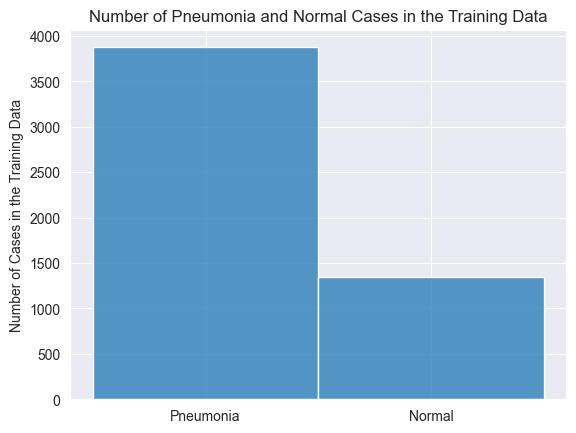

In [64]:
# Visualise the number of normal and pneumonia cases in the training data using seaborn as a barplot
labels = []
for i in train_labels:
    # 0 is pneumonia, 1 is normal in the dataset
    if i == 0:
        labels.append("Pneumonia")
    else:
        labels.append("Normal")
sns.histplot(labels)
plt.ylabel('Number of Cases in the Training Data')
plt.title('Number of Pneumonia and Normal Cases in the Training Data')
plt.show()